# PCA Relation to MSE

Just building on some additional intuition about Principal Component Analysis (PCA) and its connection to Mean Squared Error (MSE).

## Basic Idea

Suppose we have $N$ i.i.d. unlabeled vector-valued samples $\mathcal{D} = (\mathbf{x}^{(1)}, \ldots, \mathbf{x}^{(N)}) \stackrel{i.i.d.}{\sim} \mathcal{N}(\boldsymbol{\mu}, \boldsymbol{\Sigma})$ where $\mathbf{x}^{(i)} \in {\mathbb{R}}^{n}$, $\boldsymbol{\mu} \in {\mathbb{R}}^{n}$ is the mean vector and $\boldsymbol{\Sigma} \in {\mathbb{R}}^{n \times n}$ is a real symmetric positive semi-definite matrix.

In [1]:
# Widget to manipulate plots in Jupyter notebooks
%matplotlib widget 

import matplotlib.pyplot as plt
import numpy as np

import random

plt.rc('font', size=22)          # controls default text sizes
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize
plt.rc('figure', titlesize=22)   # fontsize of the figure title

# Problem set up
N = 1000
n = 10

# Generate n-dimensional N iid vector-samples from a Gaussian pdf
# Random variables will have zero mean and a symmetric PD covariance matrix
# generated from a randomly selected matrix A
A = np.random.rand(n, n)
# Not necessary, just illustrating symmetry property
Sigma = A.dot(A.T) 
# Arbitrary mean of 100 for all dimensions
mu = np.full((n, 1), 100)

# Generate N random variables of length n
X = A.dot(np.random.randn(n, N)) + mu.dot(np.ones((1, N)))
X = X.T  # observations along rows, features along columns (N x n)

Basic idea of PCA is to find a <b>linear</b> and <b>orthogonal</b> projection of a high-dimensional $\mathbf{x} \in {\mathbb{R}}^{n}$ to a low-dimensional <b>latent vector</b> $\mathbf{z} \in {\mathbb{R}}^{k}$, where $k \ll n$, such that $\mathbf{z}$ accurately represents the original data. We can acquire this latent or hidden vector via a linear projection onto the latent space: $\mathbf{z} = \mathbf{W}^\intercal\mathbf{x}$, where $\mathbf{W}$ is an orthogonal projection matrix.

We could then define how well $\mathbf{z} = \mathbf{W}^\intercal(\mathbf{x} - \boldsymbol{\mu}_{x})$ <i>represents</i> $\mathbf{x}$ based on the <b>reconstruction error</b>, usually defined by MSE, against a reconstruction or "decoding", $\mathbf{\hat{x}}= \mathbf{W}(\mathbf{z} + \boldsymbol{\mu}_{x}$). The mean $\boldsymbol{\mu}_{x}$ here illustreates how non-zero mean inputs would be centered.

From class, you know that minimizing the reconstruction error is equivalent to maximizing the variance of the projected data when the inputs are mean-centered. You also know that the directions of maximal variance in the data are the eigenvectors of its covariance matrix $\boldsymbol{\Sigma}$. Given this setup, let us first "encode" example $\mathbf{x}^{(i)}$ into a latent space of dimensionality $k$ with minimal reconstruction error as follows:

$$ \mathbf{z}^{(i)} = \mathbf{U}_k^\intercal \mathbf{x}^{(i)}, $$

where the optimal orthogonal projection matrix is $\mathbf{W^*} = \mathbf{U}_k$, with the columns of $\mathbf{U}_k$ as the $k$ eigenvectors of $\mathbf{\Sigma}$ with largest eigenvalues:

$$ \mathbf{\Sigma} = \mathbf{U}_k \mathbf{\Lambda} \mathbf{U}_k^\intercal , $$

with $\mathbf{\Lambda} = \text{diag}(\lambda_1, \ldots, \lambda_k)$, $\lambda_1 > \cdots > \lambda_k$ sorted in decreasing order of value.

Stacked into matrix form for all $N$ examples:

$$ \mathbf{Z} = \mathbf{X}\mathbf{U}_k .$$

From these $k$-dimensional principal component projections, we can reconstruct the original data approximately as follows:

$$\mathbf{\hat{x}}^{(i)} = \mathbf{U}_k \mathbf{z}^{(i)}, $$

which again in matrix form is:

$$ \mathbf{\hat{X}} = \mathbf{Z}_k \mathbf{U}_k^\intercal.$$

There you have your minimized error reconstructions!

## Problem Prompt

Let's explore the following relations against the number of principal components $k$:
- The reconstruction loss

$$ \text{MSE}_k = \frac{1}{N} \sum_{i=1}^N \|\mathbf{x}^{(i)} - \mathbf{U}_k \mathbf{z}^{(i)}\|_2^2 $$

- The fraction of variance "explained" or cumulative explained variance

$$ \text{F}_k = \frac{\text{Variance Retained by PCs}}{\text{Total Variance in Data}} = \frac{\sum_{j=1}^k \lambda_j}{\text{tr}(\mathbf{\Sigma})} \in [0, 1] $$

Now evaluate the reconstruction loss and fraction of variance explained by plotting against $k \in \{1, \ldots, n-1\}$ components, i.e., plots for $\text{MSE}_k$ vs $k$ and $\text{F}_k$ vs $k$. Note I will actually demonstrate reconstruction loss based on Root MSE (RMSE) so as to display values in the same order as our inputs.

Acquire the PCs:

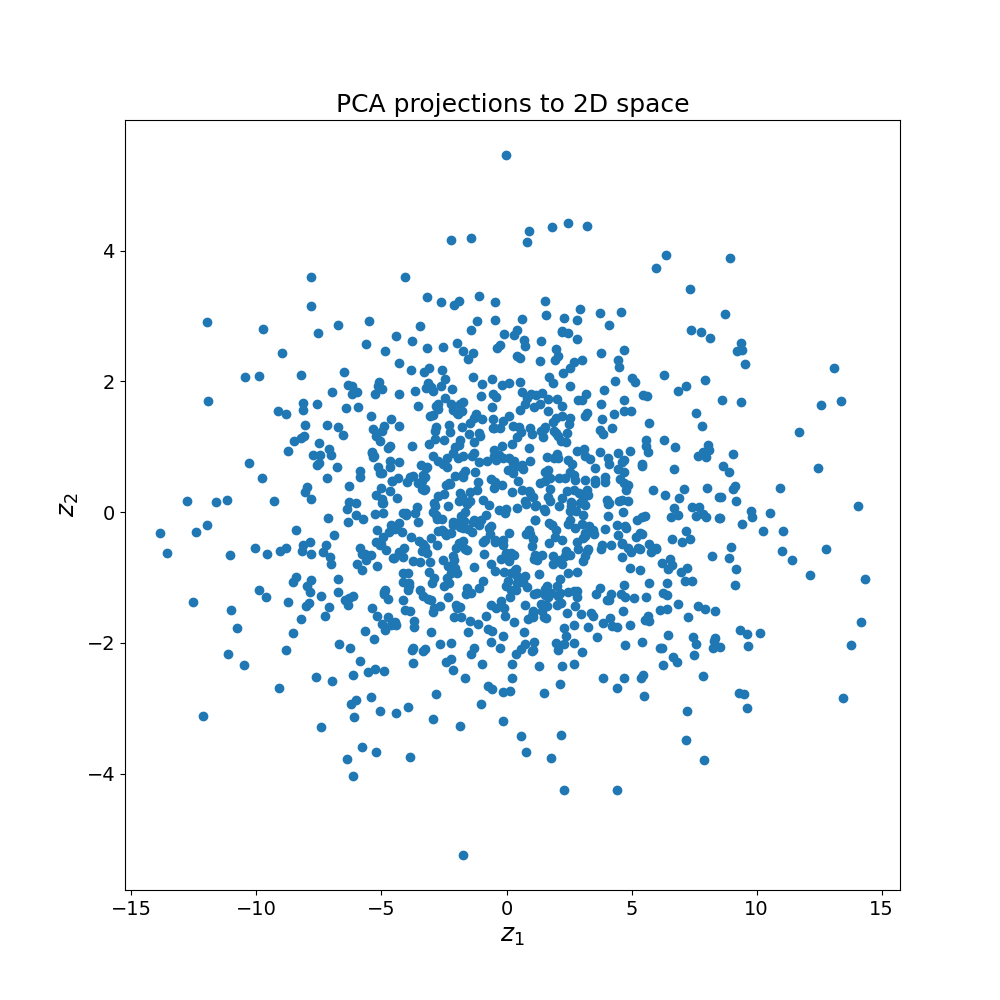

In [2]:
# First derive sample-based estimates of mean vector and covariance matrix:
mu_hat = np.mean(X, axis=0)
Sigma_hat = np.cov(X.T)

# Mean-subtraction is a necessary assumption for PCA, so perform this to obtain zero-mean sample set
C = X - mu_hat

# Get the eigenvectors (in U) and eigenvalues (in Lambda) of the estimated covariance matrix
lambdas, U = np.linalg.eig(Sigma_hat)
# Get the indices from sorting lambdas in order of increasing value, with ::-1 slicing to then reverse order
idx = lambdas.argsort()[::-1]
# Extract corresponding sorted eigenvectors and eigenvalues
U = U[:, idx]
Lambda = np.diag(lambdas[idx])

# Calculate the PC projections of zero-mean samples (in Z)
Z = C.dot(U)

# Let's see what it looks like only along the first two PCs
fig_pca, ax_pca = plt.subplots(figsize=(10, 10));
ax_pca.scatter(Z[:, 0], Z[:, 1])
ax_pca.set_xlabel(r"$z_1$")
ax_pca.set_ylabel(r"$z_2$")
ax_pca.set_title("PCA projections to 2D space".format(n))

fig_pca;

Now reconstruct the data $\mathbf{\hat{X}}$ from the projection matrix with PC directions as its column vectors $\mathbf{Z} \in \mathbb{R}^{N \times k}$, where $k \in \{1, \ldots, n-1\}$.

In [3]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

# Max number of PCs based on rank of X, or min(n, N)
X_rank = np.linalg.matrix_rank(X)

rmse = np.zeros(X_rank)
sum_eigenvals = np.zeros(X_rank)
no_components = range(1, X_rank + 1)

# Reconstruct the X data set from each set of projections
for k in no_components:
    # Reconstruct based on only the 'k' components (also revert mean-centering effect)
    X_hat = Z[:, :k].dot(U[:, :k].T) + mu_hat
    rmse[k-1] = np.sqrt(np.mean((X - X_hat)**2))
    sum_eigenvals[k-1] = np.sum(Lambda[:k])
    
# Fraction of variance explained
fraction_var = sum_eigenvals / np.trace(Sigma_hat)

Now plot and refer to Chpt. 20.1.4 of Murphy's 2022 book for further understanding!

Text(0, 0.5, 'Fraction of Variance Explained')

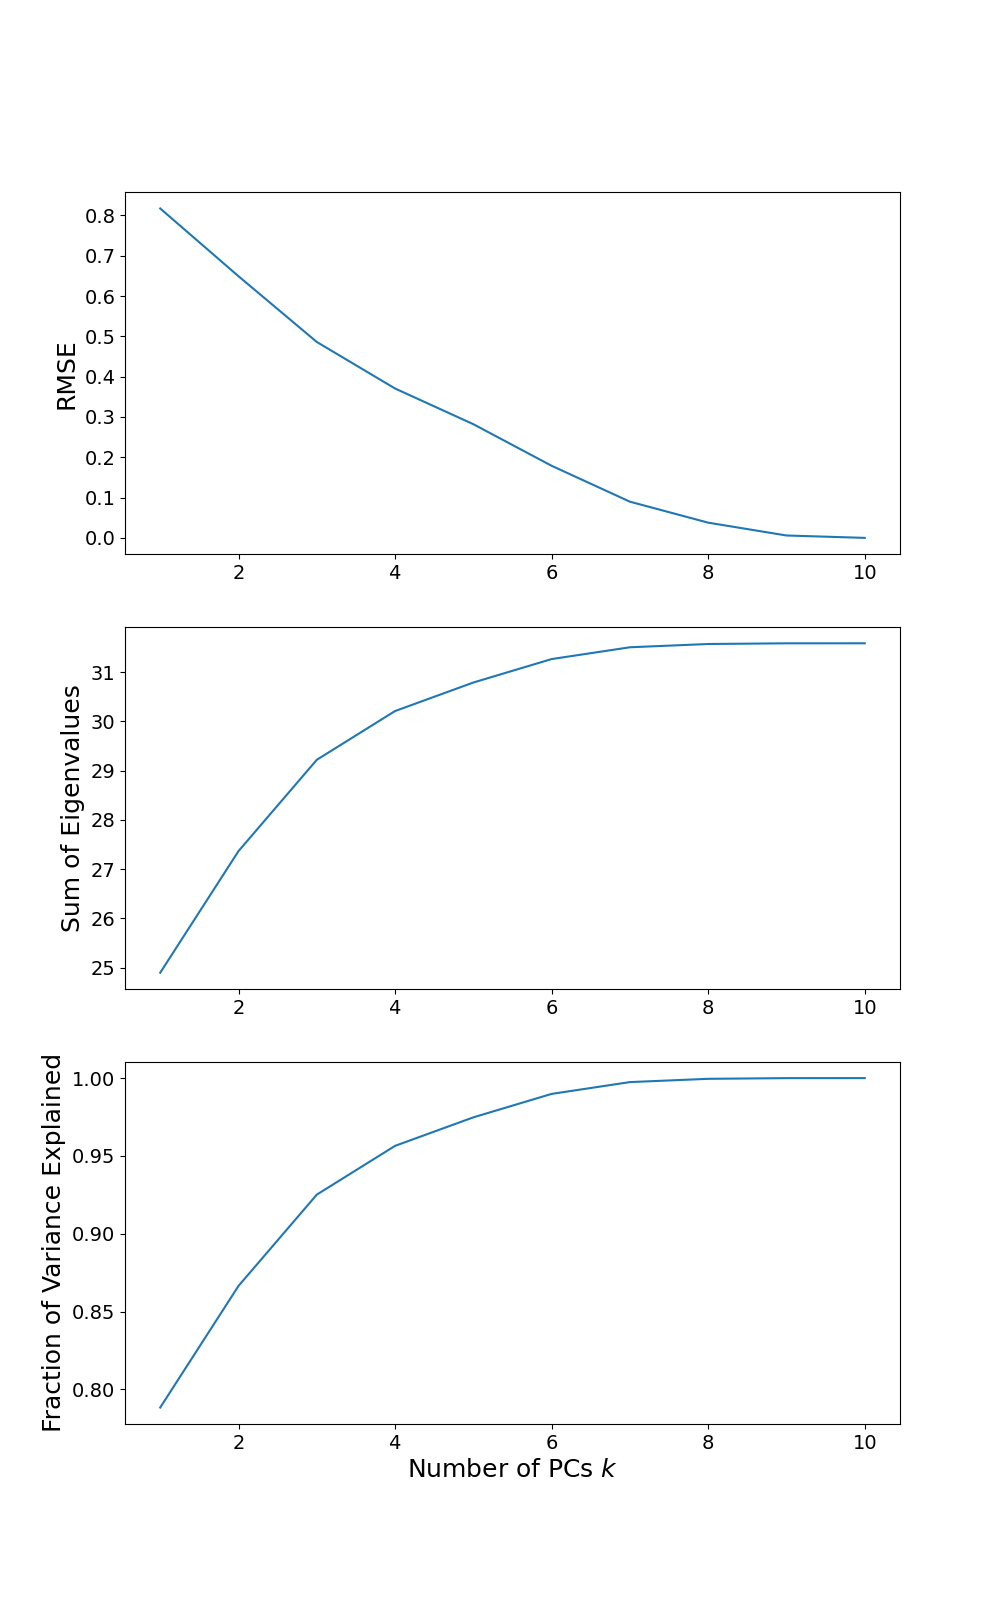

In [4]:
fig_pca_eval = plt.figure(figsize=(10, 16))

# MSE should be decreasing on each iteration, 0 for the nth
ax1 = fig_pca_eval.add_subplot(311)
ax1.plot(no_components, rmse)
ax1.set_ylabel("RMSE")

# First eigenvalue should be significantly larger than the rest
ax2 = fig_pca_eval.add_subplot(312)
ax2.plot(no_components, sum_eigenvals)
ax2.set_ylabel("Sum of Eigenvalues")

# About 95% variance explined is an acceptable target 
ax3 = fig_pca_eval.add_subplot(313)
ax3.plot(no_components, fraction_var)
ax3.set_xlabel(r"Number of PCs $k$")
ax3.set_ylabel("Fraction of Variance Explained")